OpenClassrooms
Project 4, Data Scientist
Author : Oumeima EL GHARBI
Date : August,September 2022

# Feature Engineering to predict Energies

### Introduction

#### Importing libraries

In [43]:
%reset -f

import pickle

import warnings
warnings.filterwarnings(action="ignore")

from exploration import *

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [44]:
# Heure démarrage
t0 = time()

# seed pour les générateurs aléatoires
seed = 1
print("Seed value: ", seed)

Seed value:  1


#### Loading dataset

In [45]:
global columns_to_categorize
columns_to_categorize = ["BuildingType", "PrimaryPropertyType", "Neighborhood"]
category_types = {column: 'object' for column in columns_to_categorize}

path = "./dataset/cleaned/"
filename = "data_exploration.csv"
dataset_path = "{}{}".format(path, filename)
# we assign the categorical features with a categotical type

dataset = pd.read_csv(dataset_path, encoding='utf-8', dtype=category_types)

In [46]:
dataset.shape

(3147, 21)

In [47]:
dataset.dtypes

Neighborhood                            object
BuildingType                            object
PrimaryPropertyType                     object
ENERGYSTARScore                        float64
YearBuilt                                int64
Log-NumberofFloors                     float64
Log-PropertyGFATotal                   float64
Log-PropertyGFABuilding(s)             float64
Log-LargestPropertyUseTypeGFA          float64
Log-SecondLargestPropertyUseTypeGFA    float64
Log-ThirdLargestPropertyUseTypeGFA     float64
Log-TotalEnergy(kBtu)                  float64
Log-SteamUse(kBtu)                     float64
Log-Electricity(kBtu)                  float64
Log-NaturalGas(kBtu)                   float64
Ratio_Electricity                      float64
Ratio_Steam                            float64
Ratio_Gas                              float64
Ratio_Steam+Gas                        float64
Ratio_Steam+Gas+Other                  float64
Log-TotalGHGEmissions                  float64
dtype: object

In [48]:
dataset.columns

Index(['Neighborhood', 'BuildingType', 'PrimaryPropertyType',
       'ENERGYSTARScore', 'YearBuilt', 'Log-NumberofFloors',
       'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)',
       'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA',
       'Log-ThirdLargestPropertyUseTypeGFA', 'Log-TotalEnergy(kBtu)',
       'Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)',
       'Ratio_Electricity', 'Ratio_Steam', 'Ratio_Gas', 'Ratio_Steam+Gas',
       'Ratio_Steam+Gas+Other', 'Log-TotalGHGEmissions'],
      dtype='object')

### 0) Separation common train and test dataset

##### Separation features : vectors / target

In [49]:
#model_energy_features = dataset.columns.tolist()[:-10]
models_energy_target = dataset.columns.tolist()[11:]
# Liste des variables et étiquettes
#models_energy_features = [feature for feature in dataset.columns if feature not in ['ENERGYSTARScore', *models_energy_target]]
models_energy_features = [feature for feature in dataset.columns if feature not in [*models_energy_target]]

models_energy = models_energy_features + models_energy_target

print(models_energy_features, end="\n\n")
print(models_energy_target, end="\n\n")

print("Verification :", len(models_energy_features) + len(models_energy_target) == len(models_energy))

['Neighborhood', 'BuildingType', 'PrimaryPropertyType', 'ENERGYSTARScore', 'YearBuilt', 'Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA', 'Log-ThirdLargestPropertyUseTypeGFA']

['Log-TotalEnergy(kBtu)', 'Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)', 'Ratio_Electricity', 'Ratio_Steam', 'Ratio_Gas', 'Ratio_Steam+Gas', 'Ratio_Steam+Gas+Other', 'Log-TotalGHGEmissions']

Verification : True


In [50]:
exp1_energy_target = ['Log-TotalEnergy(kBtu)', 'Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)', 'Log-TotalGHGEmissions']

exp2_energy_target = ['Ratio_Electricity', 'Ratio_Steam', 'Ratio_Gas', 'Ratio_Steam+Gas', 'Ratio_Steam+Gas+Other', 'Log-TotalGHGEmissions']

exp3_energy_target = ['Log-TotalEnergy(kBtu)', 'Log-TotalGHGEmissions']

##### Train / Test Split

In [51]:
# We create a training set and a test set (the test set contains 30% of the dataset)
train_common, test_common = train_test_split(dataset, test_size=0.3,  random_state=seed)

In [52]:
train_common

,Neighborhood,BuildingType,PrimaryPropertyType,ENERGYSTARScore,YearBuilt,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
1008,Northeast,Multifamily lr (1-4),Low-rise multifamily,NaN,1997,1.386294,10.727246,10.727246,10.122703,9.792444,...,14.067857,0.0,14.067857,0.000000,1.000000,0.0,0.000000,0.000000,-2.913661e-07,2.299581
1784,North,Multifamily lr (1-4),Low-rise multifamily,75.0,1979,1.098612,10.429783,10.429783,10.429783,6.240276,...,13.734070,0.0,13.734069,0.000000,1.000000,0.0,0.000000,0.000000,4.068188e-07,2.005526
1563,Lake union,Multifamily lr (1-4),Low-rise multifamily,72.0,1988,1.609438,10.120533,10.120533,10.120533,0.000000,...,13.380600,0.0,13.380599,0.000000,0.999999,0.0,0.000000,0.000000,7.724137e-07,1.706565
452,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,91.0,1982,1.791759,11.499526,11.499526,11.499526,0.000000,...,15.295147,0.0,15.295147,0.000000,1.000000,0.0,0.000000,0.000000,0.000000e+00,3.453474
1561,Downtown,Multifamily hr (10+),High-rise multifamily,67.0,1980,2.944439,11.738139,11.738139,11.634709,9.063811,...,15.389618,0.0,14.915060,14.416334,0.622160,0.0,0.377840,0.377840,3.778401e-01,4.777357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,East,Multifamily mr (5-9),Mid-rise multifamily,NaN,1985,1.791759,10.556620,10.556620,10.540540,0.000000,...,14.117894,0.0,14.117894,0.000000,1.000000,0.0,0.000000,0.000000,3.695274e-07,2.344686
905,Southwest,Nonresidential,Small- and mid-sized office,60.0,1981,1.386294,10.677938,10.677938,10.714440,0.000000,...,14.803849,0.0,14.671030,12.719411,0.875623,0.0,0.124377,0.124377,1.243767e-01,3.559625
1096,Northwest,Multifamily lr (1-4),Low-rise multifamily,38.0,1978,1.386294,11.397167,11.397167,11.213522,8.752423,...,14.907515,0.0,14.907515,0.000000,1.000000,0.0,0.000000,0.000000,1.677717e-07,3.080992
235,Downtown,Nonresidential,Small- and mid-sized office,72.0,1906,1.609438,11.059441,11.059441,10.946376,0.000000,...,15.073534,0.0,14.702697,13.901848,0.690156,0.0,0.309844,0.309844,3.098440e-01,4.328494


In [53]:
test_common

,Neighborhood,BuildingType,PrimaryPropertyType,ENERGYSTARScore,YearBuilt,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
3003,Ballard,Multifamily mr (5-9),Mid-rise multifamily,NaN,2013,2.079442,10.845212,10.845212,10.650555,8.664751,...,14.795924,0.000000,14.268653,13.903806,0.590213,0.000000,0.409787,0.409787,4.097867e-01,4.248209
2397,East,Multifamily lr (1-4),Low-rise multifamily,94.0,1924,1.386294,10.232539,10.232539,10.232539,0.000000,...,13.755089,0.000000,13.087863,13.035332,0.513130,0.000000,0.486870,0.486870,4.868704e-01,3.357245
1836,Greater duwamish,Nonresidential,Other,NaN,1960,0.693147,10.090382,10.090382,10.090382,0.000000,...,15.373109,0.000000,15.373109,0.000000,1.000000,0.000000,0.000000,0.000000,1.053207e-07,3.529297
2915,Magnolia / queen anne,Multifamily lr (1-4),Low-rise multifamily,93.0,2004,1.609438,10.026855,10.026855,10.026855,8.971575,...,13.755300,0.000000,13.094824,13.028380,0.516605,0.000000,0.483395,0.483395,4.833951e-01,3.352007
3,Downtown,Nonresidential,Hotel,56.0,1926,2.397895,11.023878,11.023878,11.023878,0.000000,...,15.731637,14.610513,14.833970,14.409508,0.407519,0.325913,0.266567,0.592481,5.924807e-01,5.660979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,East,Multifamily mr (5-9),Mid-rise multifamily,82.0,1999,1.945910,10.951561,10.951561,10.667862,9.553292,...,13.993951,0.000000,13.993951,0.000000,1.000000,0.000000,0.000000,0.000000,2.091435e-07,2.233235
3136,Greater duwamish,Nonresidential,K-12 school,77.0,2015,1.386294,10.714440,10.714440,10.730488,0.000000,...,14.097658,0.000000,14.097658,0.000000,1.000000,0.000000,0.000000,0.000000,-1.885408e-07,2.326302
2503,Northwest,Multifamily lr (1-4),Low-rise multifamily,85.0,2008,1.609438,12.161216,11.053696,12.610347,11.760184,...,16.011291,0.000000,15.487364,15.114336,0.592190,0.000000,0.407810,0.407810,4.078097e-01,5.449965
1995,Lake union,Multifamily mr (5-9),Mid-rise multifamily,68.0,2005,2.197225,11.827729,11.827729,11.426932,0.000000,...,14.930136,0.000000,14.829213,12.586709,0.904002,0.000000,0.095998,0.095998,9.599792e-02,3.576550


### 1) Experiment predict Energy

#### 1.1) Selection of features

In [54]:
dataset.columns

Index(['Neighborhood', 'BuildingType', 'PrimaryPropertyType',
       'ENERGYSTARScore', 'YearBuilt', 'Log-NumberofFloors',
       'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)',
       'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA',
       'Log-ThirdLargestPropertyUseTypeGFA', 'Log-TotalEnergy(kBtu)',
       'Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)',
       'Ratio_Electricity', 'Ratio_Steam', 'Ratio_Gas', 'Ratio_Steam+Gas',
       'Ratio_Steam+Gas+Other', 'Log-TotalGHGEmissions'],
      dtype='object')

#### 1.2) Separation train and test dataset

In [55]:
# Selection des variables pour modélisation CO2
train_energy, test_energy = train_common[models_energy], test_common[models_energy]

In [56]:
train_energy

,Neighborhood,BuildingType,PrimaryPropertyType,ENERGYSTARScore,YearBuilt,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
1008,Northeast,Multifamily lr (1-4),Low-rise multifamily,NaN,1997,1.386294,10.727246,10.727246,10.122703,9.792444,...,14.067857,0.0,14.067857,0.000000,1.000000,0.0,0.000000,0.000000,-2.913661e-07,2.299581
1784,North,Multifamily lr (1-4),Low-rise multifamily,75.0,1979,1.098612,10.429783,10.429783,10.429783,6.240276,...,13.734070,0.0,13.734069,0.000000,1.000000,0.0,0.000000,0.000000,4.068188e-07,2.005526
1563,Lake union,Multifamily lr (1-4),Low-rise multifamily,72.0,1988,1.609438,10.120533,10.120533,10.120533,0.000000,...,13.380600,0.0,13.380599,0.000000,0.999999,0.0,0.000000,0.000000,7.724137e-07,1.706565
452,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,91.0,1982,1.791759,11.499526,11.499526,11.499526,0.000000,...,15.295147,0.0,15.295147,0.000000,1.000000,0.0,0.000000,0.000000,0.000000e+00,3.453474
1561,Downtown,Multifamily hr (10+),High-rise multifamily,67.0,1980,2.944439,11.738139,11.738139,11.634709,9.063811,...,15.389618,0.0,14.915060,14.416334,0.622160,0.0,0.377840,0.377840,3.778401e-01,4.777357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,East,Multifamily mr (5-9),Mid-rise multifamily,NaN,1985,1.791759,10.556620,10.556620,10.540540,0.000000,...,14.117894,0.0,14.117894,0.000000,1.000000,0.0,0.000000,0.000000,3.695274e-07,2.344686
905,Southwest,Nonresidential,Small- and mid-sized office,60.0,1981,1.386294,10.677938,10.677938,10.714440,0.000000,...,14.803849,0.0,14.671030,12.719411,0.875623,0.0,0.124377,0.124377,1.243767e-01,3.559625
1096,Northwest,Multifamily lr (1-4),Low-rise multifamily,38.0,1978,1.386294,11.397167,11.397167,11.213522,8.752423,...,14.907515,0.0,14.907515,0.000000,1.000000,0.0,0.000000,0.000000,1.677717e-07,3.080992
235,Downtown,Nonresidential,Small- and mid-sized office,72.0,1906,1.609438,11.059441,11.059441,10.946376,0.000000,...,15.073534,0.0,14.702697,13.901848,0.690156,0.0,0.309844,0.309844,3.098440e-01,4.328494


#### 1.3) Normalization

In [57]:
print("We separate categorical variables from numerical variables.")

We separate categorical variables from numerical variables.


In [58]:
dataset.select_dtypes('object') # we don't have 'object' here but it is just in case.

categorical_columns = dataset.select_dtypes('object').columns
numerical_columns = dataset[models_energy_features].select_dtypes(include='number').columns.drop("YearBuilt").drop("ENERGYSTARScore") ###
#numerical_columns = X.select_dtypes(include='number').columns
print("We won't normalise the year so we drop it from numerical_columns.")

print("Shape of categorical variables : ", categorical_columns.shape)
print("Shape of numerical variables :", numerical_columns.shape)

We won't normalise the year so we drop it from numerical_columns.
Shape of categorical variables :  (3,)
Shape of numerical variables : (6,)


##### 1) Data Standardisation

We have to standardize the variables before learning a **Ridge Regression**.
Standardizing means that each variable will have a **standard deviation** equal to 1.

In [59]:
print("Numerical variables standardization")
print("We have :", numerical_columns.shape[0], "numerical features to standardize.",end="\n\n")

print(numerical_columns)

Numerical variables standardization
We have : 6 numerical features to standardize.

Index(['Log-NumberofFloors', 'Log-PropertyGFATotal',
       'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA',
       'Log-SecondLargestPropertyUseTypeGFA',
       'Log-ThirdLargestPropertyUseTypeGFA'],
      dtype='object')


In [60]:
# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scaler_energy = StandardScaler().fit(train_energy[numerical_columns])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_energy_std, test_energy_std = train_energy.copy(), test_energy.copy()

train_energy_std[numerical_columns] = std_scaler_energy.transform(train_energy[numerical_columns])
test_energy_std[numerical_columns] = std_scaler_energy.transform(test_energy[numerical_columns])

print("Before")
display(train_energy)
print("After")
display(train_energy_std)

Before


,Neighborhood,BuildingType,PrimaryPropertyType,ENERGYSTARScore,YearBuilt,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
1008,Northeast,Multifamily lr (1-4),Low-rise multifamily,NaN,1997,1.386294,10.727246,10.727246,10.122703,9.792444,...,14.067857,0.0,14.067857,0.000000,1.000000,0.0,0.000000,0.000000,-2.913661e-07,2.299581
1784,North,Multifamily lr (1-4),Low-rise multifamily,75.0,1979,1.098612,10.429783,10.429783,10.429783,6.240276,...,13.734070,0.0,13.734069,0.000000,1.000000,0.0,0.000000,0.000000,4.068188e-07,2.005526
1563,Lake union,Multifamily lr (1-4),Low-rise multifamily,72.0,1988,1.609438,10.120533,10.120533,10.120533,0.000000,...,13.380600,0.0,13.380599,0.000000,0.999999,0.0,0.000000,0.000000,7.724137e-07,1.706565
452,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,91.0,1982,1.791759,11.499526,11.499526,11.499526,0.000000,...,15.295147,0.0,15.295147,0.000000,1.000000,0.0,0.000000,0.000000,0.000000e+00,3.453474
1561,Downtown,Multifamily hr (10+),High-rise multifamily,67.0,1980,2.944439,11.738139,11.738139,11.634709,9.063811,...,15.389618,0.0,14.915060,14.416334,0.622160,0.0,0.377840,0.377840,3.778401e-01,4.777357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,East,Multifamily mr (5-9),Mid-rise multifamily,NaN,1985,1.791759,10.556620,10.556620,10.540540,0.000000,...,14.117894,0.0,14.117894,0.000000,1.000000,0.0,0.000000,0.000000,3.695274e-07,2.344686
905,Southwest,Nonresidential,Small- and mid-sized office,60.0,1981,1.386294,10.677938,10.677938,10.714440,0.000000,...,14.803849,0.0,14.671030,12.719411,0.875623,0.0,0.124377,0.124377,1.243767e-01,3.559625
1096,Northwest,Multifamily lr (1-4),Low-rise multifamily,38.0,1978,1.386294,11.397167,11.397167,11.213522,8.752423,...,14.907515,0.0,14.907515,0.000000,1.000000,0.0,0.000000,0.000000,1.677717e-07,3.080992
235,Downtown,Nonresidential,Small- and mid-sized office,72.0,1906,1.609438,11.059441,11.059441,10.946376,0.000000,...,15.073534,0.0,14.702697,13.901848,0.690156,0.0,0.309844,0.309844,3.098440e-01,4.328494


After


,Neighborhood,BuildingType,PrimaryPropertyType,ENERGYSTARScore,YearBuilt,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
1008,Northeast,Multifamily lr (1-4),Low-rise multifamily,NaN,1997,-0.287309,-0.238103,-0.185567,-0.759311,1.108652,...,14.067857,0.0,14.067857,0.000000,1.000000,0.0,0.000000,0.000000,-2.913661e-07,2.299581
1784,North,Multifamily lr (1-4),Low-rise multifamily,75.0,1979,-0.782088,-0.582698,-0.543051,-0.397685,0.371487,...,13.734070,0.0,13.734069,0.000000,1.000000,0.0,0.000000,0.000000,4.068188e-07,2.005526
1563,Lake union,Multifamily lr (1-4),Low-rise multifamily,72.0,1988,0.096471,-0.940947,-0.914700,-0.761868,-0.923528,...,13.380600,0.0,13.380599,0.000000,0.999999,0.0,0.000000,0.000000,7.724137e-07,1.706565
452,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,91.0,1982,0.410042,0.656541,0.742540,0.862077,-0.923528,...,15.295147,0.0,15.295147,0.000000,1.000000,0.0,0.000000,0.000000,0.000000e+00,3.453474
1561,Downtown,Multifamily hr (10+),High-rise multifamily,67.0,1980,2.392512,0.932961,1.029299,1.021273,0.957442,...,15.389618,0.0,14.915060,14.416334,0.622160,0.0,0.377840,0.377840,3.778401e-01,4.777357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,East,Multifamily mr (5-9),Mid-rise multifamily,NaN,1985,0.410042,-0.435764,-0.390622,-0.267254,-0.923528,...,14.117894,0.0,14.117894,0.000000,1.000000,0.0,0.000000,0.000000,3.695274e-07,2.344686
905,Southwest,Nonresidential,Small- and mid-sized office,60.0,1981,-0.287309,-0.295223,-0.244824,-0.062464,-0.923528,...,14.803849,0.0,14.671030,12.719411,0.875623,0.0,0.124377,0.124377,1.243767e-01,3.559625
1096,Northwest,Multifamily lr (1-4),Low-rise multifamily,38.0,1978,-0.287309,0.537964,0.619527,0.525270,0.892821,...,14.907515,0.0,14.907515,0.000000,1.000000,0.0,0.000000,0.000000,1.677717e-07,3.080992
235,Downtown,Nonresidential,Small- and mid-sized office,72.0,1906,0.096471,0.146726,0.213656,0.210670,-0.923528,...,15.073534,0.0,14.702697,13.901848,0.690156,0.0,0.309844,0.309844,3.098440e-01,4.328494


##### 2) Feature Encoding : One Hot Encoder

In [61]:
print("Categorical variables featuring")

print("We have :", categorical_columns.shape[0], "categorical features to encode.", end="\n\n")
print(categorical_columns)

Categorical variables featuring
We have : 3 categorical features to encode.

Index(['Neighborhood', 'BuildingType', 'PrimaryPropertyType'], dtype='object')


In [62]:
train_energy.dtypes # we check that we have categories

Neighborhood                            object
BuildingType                            object
PrimaryPropertyType                     object
ENERGYSTARScore                        float64
YearBuilt                                int64
Log-NumberofFloors                     float64
Log-PropertyGFATotal                   float64
Log-PropertyGFABuilding(s)             float64
Log-LargestPropertyUseTypeGFA          float64
Log-SecondLargestPropertyUseTypeGFA    float64
Log-ThirdLargestPropertyUseTypeGFA     float64
Log-TotalEnergy(kBtu)                  float64
Log-SteamUse(kBtu)                     float64
Log-Electricity(kBtu)                  float64
Log-NaturalGas(kBtu)                   float64
Ratio_Electricity                      float64
Ratio_Steam                            float64
Ratio_Gas                              float64
Ratio_Steam+Gas                        float64
Ratio_Steam+Gas+Other                  float64
Log-TotalGHGEmissions                  float64
dtype: object

In [63]:
train_energy[categorical_columns].nunique()

Neighborhood           13
BuildingType            7
PrimaryPropertyType    23
dtype: int64

In [64]:
train_energy_std[categorical_columns]

,Neighborhood,BuildingType,PrimaryPropertyType
1008,Northeast,Multifamily lr (1-4),Low-rise multifamily
1784,North,Multifamily lr (1-4),Low-rise multifamily
1563,Lake union,Multifamily lr (1-4),Low-rise multifamily
452,Magnolia / queen anne,Nonresidential,Small- and mid-sized office
1561,Downtown,Multifamily hr (10+),High-rise multifamily
...,...,...,...
2763,East,Multifamily mr (5-9),Mid-rise multifamily
905,Southwest,Nonresidential,Small- and mid-sized office
1096,Northwest,Multifamily lr (1-4),Low-rise multifamily
235,Downtown,Nonresidential,Small- and mid-sized office


##### Encoding the categorical features of the train set


In [65]:
print("Now, we can use the One Hot Encoder.")
print("With the one hot encoder, we will get :", sum([train_energy[categorical_columns].nunique()[i] for i in range(len(categorical_columns))]), "columns to encodes the categorical features.")

Now, we can use the One Hot Encoder.
With the one hot encoder, we will get : 43 columns to encodes the categorical features.


In [66]:
# 0) creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # if sparse=True (by default), we need to add .toarray() to encoded_categorical_data

# 1) Fit the encoder on the training set
one_hot_encoder.fit(train_energy_std[categorical_columns])

# 2) we get the encoded numpy array
encoded_categorical_data = one_hot_encoder.transform(train_energy_std[categorical_columns])

# 3) we make a list of the columns names
encoded_categorical_data_names = one_hot_encoder.get_feature_names_out().tolist()
print("We have indeed :", len(encoded_categorical_data_names), "labels after encoding the categorical variables.")

# 4) we recreate a dataframe with the column names and the numpy array
train_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                               data=encoded_categorical_data,
                               index=train_energy_std.index)
display(train_encoded.sort_index())

We have indeed : 43 labels after encoding the categorical variables.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Residence hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail store,PrimaryPropertyType_Self-storage facility,PrimaryPropertyType_Senior care community,PrimaryPropertyType_Small- and mid-sized office,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# 5) Concatenate the two dataframes for the training set

print("We need to add YearBuilt to the list of features.")
numerical_columns.tolist()
features_to_merge = numerical_columns.tolist().copy()
features_to_merge.append("YearBuilt")
features_to_merge.append("ENERGYSTARScore")
features_to_merge.extend(models_energy_target)
print(features_to_merge, end="\n\n")

# when merging, we put the categorical features first so that the targets will be at the end of the dataframe.
train_std_encoded = pd.merge(train_encoded.sort_index(), train_energy_std[features_to_merge].sort_index(), left_index=True, right_index=True)
display(train_std_encoded.sort_index())

We need to add YearBuilt to the list of features.
['Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA', 'Log-ThirdLargestPropertyUseTypeGFA', 'YearBuilt', 'ENERGYSTARScore', 'Log-TotalEnergy(kBtu)', 'Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)', 'Ratio_Electricity', 'Ratio_Steam', 'Ratio_Gas', 'Ratio_Steam+Gas', 'Ratio_Steam+Gas+Other', 'Log-TotalGHGEmissions']



,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.793246,14.510597,15.188220,14.059596,0.546060,0.277302,0.176638,0.453940,0.453940,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.942305,0.000000,14.991964,15.453552,0.386609,0.000000,0.613391,0.613391,0.613391,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.100297,16.886654,17.718022,14.216834,0.682307,0.297113,0.020579,0.317693,0.317693,7.645053
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.307609,0.000000,15.813123,15.366298,0.609884,0.000000,0.390116,0.390116,0.390116,5.713106
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.655764,14.638056,15.106575,12.861492,0.577418,0.361423,0.061159,0.422582,0.422582,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,13.973179,0.000000,13.513113,12.975567,0.631241,0.000000,0.368758,0.368758,0.368759,3.370051
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.595677,0.000000,13.679047,14.085077,0.399864,0.000000,0.600136,0.600136,0.600136,4.338858
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14.664658,0.000000,14.223590,13.633661,0.643349,0.000000,0.356651,0.356651,0.356651,4.021057
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,16.616899,0.000000,15.991918,15.850596,0.535272,0.000000,0.464728,0.464728,0.464728,6.150390


##### Encoding the categorical features of the test set

In [68]:
# 5) One Hot Encoding on the testing set

# 5.1) we get the encoded numpy array
TEST_encoded_categorical_data = one_hot_encoder.transform(test_energy_std[categorical_columns])

# 5.2) we recreate a dataframe with the column names and the numpy array
test_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                               data=TEST_encoded_categorical_data,
                               index=test_energy_std.index)
display(test_encoded.sort_index())

# when merging, we put the categorical features first so that the targets will be at the end of the dataframe.
test_std_encoded = pd.merge(test_encoded.sort_index(), test_energy_std[features_to_merge].sort_index(), left_index=True, right_index=True)
display(test_std_encoded.sort_index())

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Residence hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail store,PrimaryPropertyType_Self-storage facility,PrimaryPropertyType_Senior care community,PrimaryPropertyType_Small- and mid-sized office,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.731637,14.610513,14.833970,14.409508,0.407519,0.325913,0.266567,0.592481,5.924807e-01,5.660979
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.466822,0.000000,15.496079,15.990717,0.378802,0.000000,0.621198,0.621198,6.211983e-01,6.226556
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.566239,0.000000,14.849128,14.896495,0.488160,0.000000,0.511840,0.511840,5.118397e-01,5.176940
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.589139,15.471291,15.638062,15.339794,0.386325,0.326983,0.286692,0.613675,6.136752e-01,6.539962
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.701983,14.320129,14.110417,15.095529,0.203606,0.251113,0.545281,0.796394,7.963935e-01,5.796757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,15.696876,0.000000,14.946797,15.057593,0.472329,0.000000,0.527671,0.527671,5.276708e-01,5.330397
3142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,14.586193,0.000000,14.586193,0.000000,1.000000,0.000000,0.000000,0.000000,1.156743e-07,2.776954
3143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,17.488365,0.000000,16.978316,16.570909,0.600466,0.000000,0.399534,0.399534,3.995342e-01,6.908815
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.083074,0.000000,14.503028,14.262382,0.559873,0.000000,0.440127,0.440127,4.401271e-01,4.583947


In [69]:
print("We can start now the modelling to predict the feature wanted.")

display(train_std_encoded)
display(test_std_encoded)

We can start now the modelling to predict the feature wanted.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.793246,14.510597,15.188220,14.059596,0.546060,0.277302,0.176638,0.453940,0.453940,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.942305,0.000000,14.991964,15.453552,0.386609,0.000000,0.613391,0.613391,0.613391,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.100297,16.886654,17.718022,14.216834,0.682307,0.297113,0.020579,0.317693,0.317693,7.645053
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.307609,0.000000,15.813123,15.366298,0.609884,0.000000,0.390116,0.390116,0.390116,5.713106
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.655764,14.638056,15.106575,12.861492,0.577418,0.361423,0.061159,0.422582,0.422582,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,13.973179,0.000000,13.513113,12.975567,0.631241,0.000000,0.368758,0.368758,0.368759,3.370051
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.595677,0.000000,13.679047,14.085077,0.399864,0.000000,0.600136,0.600136,0.600136,4.338858
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14.664658,0.000000,14.223590,13.633661,0.643349,0.000000,0.356651,0.356651,0.356651,4.021057
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,16.616899,0.000000,15.991918,15.850596,0.535272,0.000000,0.464728,0.464728,0.464728,6.150390


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.731637,14.610513,14.833970,14.409508,0.407519,0.325913,0.266567,0.592481,5.924807e-01,5.660979
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.466822,0.000000,15.496079,15.990717,0.378802,0.000000,0.621198,0.621198,6.211983e-01,6.226556
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.566239,0.000000,14.849128,14.896495,0.488160,0.000000,0.511840,0.511840,5.118397e-01,5.176940
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.589139,15.471291,15.638062,15.339794,0.386325,0.326983,0.286692,0.613675,6.136752e-01,6.539962
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.701983,14.320129,14.110417,15.095529,0.203606,0.251113,0.545281,0.796394,7.963935e-01,5.796757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,15.696876,0.000000,14.946797,15.057593,0.472329,0.000000,0.527671,0.527671,5.276708e-01,5.330397
3142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,14.586193,0.000000,14.586193,0.000000,1.000000,0.000000,0.000000,0.000000,1.156743e-07,2.776954
3143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,17.488365,0.000000,16.978316,16.570909,0.600466,0.000000,0.399534,0.399534,3.995342e-01,6.908815
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.083074,0.000000,14.503028,14.262382,0.559873,0.000000,0.440127,0.440127,4.401271e-01,4.583947


In [70]:
print("We rename train_std_encoded to train_energy_preprocess the same for test_std_encoded.")
train_energy_preprocess = train_std_encoded.copy()
test_energy_preprocess = test_std_encoded.copy()

We rename train_std_encoded to train_energy_preprocess the same for test_std_encoded.


In [71]:
display(train_energy_preprocess)

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.793246,14.510597,15.188220,14.059596,0.546060,0.277302,0.176638,0.453940,0.453940,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.942305,0.000000,14.991964,15.453552,0.386609,0.000000,0.613391,0.613391,0.613391,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.100297,16.886654,17.718022,14.216834,0.682307,0.297113,0.020579,0.317693,0.317693,7.645053
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.307609,0.000000,15.813123,15.366298,0.609884,0.000000,0.390116,0.390116,0.390116,5.713106
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.655764,14.638056,15.106575,12.861492,0.577418,0.361423,0.061159,0.422582,0.422582,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,13.973179,0.000000,13.513113,12.975567,0.631241,0.000000,0.368758,0.368758,0.368759,3.370051
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.595677,0.000000,13.679047,14.085077,0.399864,0.000000,0.600136,0.600136,0.600136,4.338858
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14.664658,0.000000,14.223590,13.633661,0.643349,0.000000,0.356651,0.356651,0.356651,4.021057
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,16.616899,0.000000,15.991918,15.850596,0.535272,0.000000,0.464728,0.464728,0.464728,6.150390


#### 1.4) Distribution of variables

We can check that the numerical variables have a Standard Normal distribution.
___Density distribution___


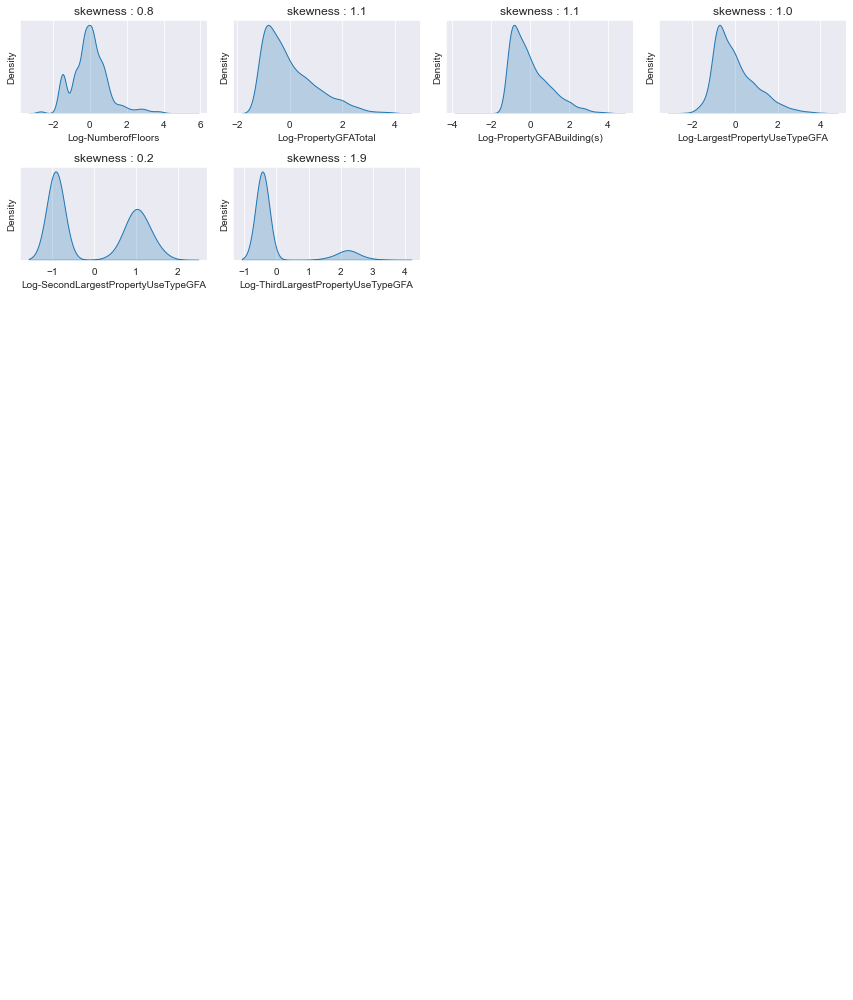

In [72]:
print("We can check that the numerical variables have a Standard Normal distribution.")
density(train_energy_preprocess[numerical_columns])

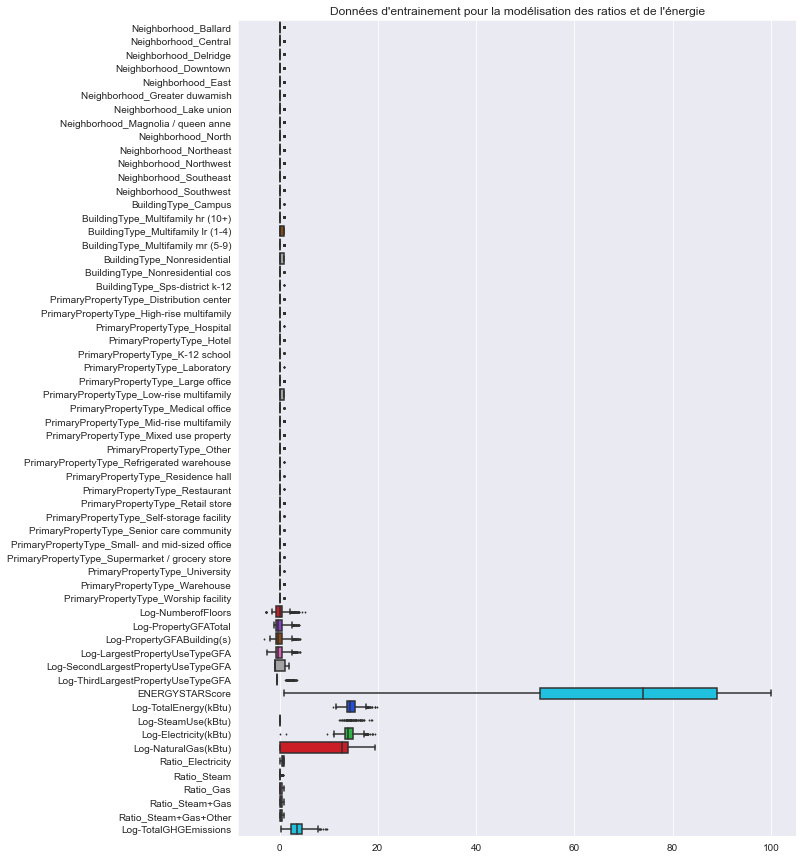

In [73]:
train_plot = train_energy_preprocess.drop(columns="YearBuilt")

# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(10,15))
plt.title('Données d\'entrainement pour la modélisation des ratios et de l\'énergie')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_plot), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

#### 1.5) Saving dataset

In [74]:
numerical_columns

Index(['Log-NumberofFloors', 'Log-PropertyGFATotal',
       'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA',
       'Log-SecondLargestPropertyUseTypeGFA',
       'Log-ThirdLargestPropertyUseTypeGFA'],
      dtype='object')

In [75]:
path_save_energy = "{}/dataset/energy/"

train_energy_preprocess

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.793246,14.510597,15.188220,14.059596,0.546060,0.277302,0.176638,0.453940,0.453940,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.942305,0.000000,14.991964,15.453552,0.386609,0.000000,0.613391,0.613391,0.613391,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.100297,16.886654,17.718022,14.216834,0.682307,0.297113,0.020579,0.317693,0.317693,7.645053
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.307609,0.000000,15.813123,15.366298,0.609884,0.000000,0.390116,0.390116,0.390116,5.713106
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.655764,14.638056,15.106575,12.861492,0.577418,0.361423,0.061159,0.422582,0.422582,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,13.973179,0.000000,13.513113,12.975567,0.631241,0.000000,0.368758,0.368758,0.368759,3.370051
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.595677,0.000000,13.679047,14.085077,0.399864,0.000000,0.600136,0.600136,0.600136,4.338858
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14.664658,0.000000,14.223590,13.633661,0.643349,0.000000,0.356651,0.356651,0.356651,4.021057
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,16.616899,0.000000,15.991918,15.850596,0.535272,0.000000,0.464728,0.464728,0.464728,6.150390


In [76]:
print("TEST")
l_energy_features = [i for i in range(50)]
l_target_features = [i for i in range(-10, -6)]
l = l_energy_features + l_target_features + [-11, -1] # -11 for EnergyStarScore, -1 for CO2
train_energy_preprocess.iloc[:, l]

TEST


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),ENERGYSTARScore,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.733123,-0.923528,-0.439239,1927,15.793246,14.510597,15.188220,14.059596,60.0,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.670863,1.072892,2.153810,1996,15.942305,0.000000,14.991964,15.453552,61.0,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.260821,-0.923528,-0.439239,1969,18.100297,16.886654,17.718022,14.216834,43.0,7.645053
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.738385,-0.923528,-0.439239,1999,16.307609,0.000000,15.813123,15.366298,NaN,5.713106
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.909942,-0.923528,-0.439239,1926,15.655764,14.638056,15.106575,12.861492,NaN,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.143318,0.841584,-0.439239,2015,13.973179,0.000000,13.513113,12.975567,88.0,3.370051
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.752192,0.866893,2.071010,2015,14.595677,0.000000,13.679047,14.085077,NaN,4.338858
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.478537,-0.923528,-0.439239,2015,14.664658,0.000000,14.223590,13.633661,99.0,4.021057
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.265880,-0.923528,-0.439239,2015,16.616899,0.000000,15.991918,15.850596,69.0,6.150390


#### Experiment 1

In [77]:
experiment_dir = "Experiment_1_log"
l_energy_features = [i for i in range(50)]
l_target_features = [i for i in range(-10, -6)]
l = l_energy_features + l_target_features + [-11, -1]
train_energy_preprocess_1 = train_energy_preprocess.iloc[:, l]
test_energy_preprocess_1 = test_energy_preprocess.iloc[:, l]


# Sauvegarde des jeux de données
train_energy_preprocess_1.to_csv("{}{}".format(path_save_energy.format(experiment_dir), "train_energy.csv"), encoding='utf-8', index=False)
test_energy_preprocess_1.to_csv("{}{}".format(path_save_energy.format(experiment_dir), "test_energy.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_energy, 'scaler_features': numerical_columns.tolist(), 'encoder': one_hot_encoder, 'encoder_features': categorical_columns.tolist()}
filename = '{}/model/scaler_encoder_energy.sav'.format(experiment_dir)
pickle.dump(model, open(filename, 'wb'))

In [78]:
train_energy_preprocess_1

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),ENERGYSTARScore,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.733123,-0.923528,-0.439239,1927,15.793246,14.510597,15.188220,14.059596,60.0,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.670863,1.072892,2.153810,1996,15.942305,0.000000,14.991964,15.453552,61.0,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.260821,-0.923528,-0.439239,1969,18.100297,16.886654,17.718022,14.216834,43.0,7.645053
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.738385,-0.923528,-0.439239,1999,16.307609,0.000000,15.813123,15.366298,NaN,5.713106
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.909942,-0.923528,-0.439239,1926,15.655764,14.638056,15.106575,12.861492,NaN,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.143318,0.841584,-0.439239,2015,13.973179,0.000000,13.513113,12.975567,88.0,3.370051
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.752192,0.866893,2.071010,2015,14.595677,0.000000,13.679047,14.085077,NaN,4.338858
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.478537,-0.923528,-0.439239,2015,14.664658,0.000000,14.223590,13.633661,99.0,4.021057
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.265880,-0.923528,-0.439239,2015,16.616899,0.000000,15.991918,15.850596,69.0,6.150390


#### Experiment 2

In [79]:
experiment_dir = "Experiment_2_ratio"
l_energy_features = [i for i in range(50)]
l_target_features = [i for i in range(-6, -1)]
l = l_energy_features + l_target_features + [-11, -1]

train_energy_preprocess_2 = train_energy_preprocess.iloc[:, l]
test_energy_preprocess_2 = test_energy_preprocess.iloc[:, l]

# Sauvegarde des jeux de données
train_energy_preprocess_2.to_csv("{}{}".format(path_save_energy.format(experiment_dir), "train_energy.csv"), encoding='utf-8', index=False)
test_energy_preprocess_2.to_csv("{}{}".format(path_save_energy.format(experiment_dir), "test_energy.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_energy, 'scaler_features': numerical_columns.tolist(), 'encoder': one_hot_encoder, 'encoder_features': categorical_columns.tolist()}
filename = '{}/model/scaler_encoder_energy.sav'.format(experiment_dir)
pickle.dump(model, open(filename, 'wb'))

In [80]:
train_energy_preprocess_2

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,ENERGYSTARScore,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1927,0.546060,0.277302,0.176638,0.453940,0.453940,60.0,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.072892,2.153810,1996,0.386609,0.000000,0.613391,0.613391,0.613391,61.0,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1969,0.682307,0.297113,0.020579,0.317693,0.317693,43.0,7.645053
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1999,0.609884,0.000000,0.390116,0.390116,0.390116,NaN,5.713106
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1926,0.577418,0.361423,0.061159,0.422582,0.422582,NaN,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.841584,-0.439239,2015,0.631241,0.000000,0.368758,0.368758,0.368759,88.0,3.370051
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866893,2.071010,2015,0.399864,0.000000,0.600136,0.600136,0.600136,NaN,4.338858
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.923528,-0.439239,2015,0.643349,0.000000,0.356651,0.356651,0.356651,99.0,4.021057
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.923528,-0.439239,2015,0.535272,0.000000,0.464728,0.464728,0.464728,69.0,6.150390


#### Experiment 3

In [81]:
experiment_dir = "Experiment_3_final_predictions"
l_energy_features = [i for i in range(50)]
l_target_features = [-10]
l = l_energy_features + l_target_features + [-11, -1]

train_energy_preprocess_3 = train_energy_preprocess.iloc[:, l]
test_energy_preprocess_3 = test_energy_preprocess.iloc[:, l]

# Sauvegarde des jeux de données
train_energy_preprocess_3.to_csv("{}{}".format(path_save_energy.format(experiment_dir), "train_energy.csv"), encoding='utf-8', index=False)
test_energy_preprocess_3.to_csv("{}{}".format(path_save_energy.format(experiment_dir), "test_energy.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_energy, 'scaler_features': numerical_columns.tolist(), 'encoder': one_hot_encoder, 'encoder_features': categorical_columns.tolist()}
filename = '{}/model/scaler_encoder_energy.sav'.format(experiment_dir)
pickle.dump(model, open(filename, 'wb'))

In [82]:
train_energy_preprocess_3

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Log-TotalEnergy(kBtu),ENERGYSTARScore,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.739835,0.529688,0.610942,0.733123,-0.923528,-0.439239,1927,15.793246,60.0,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.602172,0.712666,0.611865,0.670863,1.072892,2.153810,1996,15.942305,61.0,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.756773,3.287491,3.195060,3.260821,-0.923528,-0.439239,1969,18.100297,43.0,7.645053
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.782088,0.640225,0.146566,0.738385,-0.923528,-0.439239,1999,16.307609,NaN,5.713106
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.107393,0.703626,0.791386,0.909942,-0.923528,-0.439239,1926,15.655764,NaN,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.096471,-0.349445,-0.301074,-0.143318,0.841584,-0.439239,2015,13.973179,88.0,3.370051
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.287309,-0.913535,-0.915136,-0.752192,0.866893,2.071010,2015,14.595677,NaN,4.338858
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.904820,0.151911,0.124058,0.478537,-0.923528,-0.439239,2015,14.664658,99.0,4.021057
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.904820,2.037475,2.175125,2.265880,-0.923528,-0.439239,2015,16.616899,69.0,6.150390


In [83]:
t1 = time()
print("computing time : {:8.6f} sec".format(t1-t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1-t0)))

computing time : 6.268167 sec
computing time : 00:00:06
